<a href="https://colab.research.google.com/github/Geronimo-Sanchez-Python/GHS.Python/blob/main/LaboratorioN%C2%BA3_Clustering_Zonas_Seg%C3%BAn_Peligro_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LABORATORIO Nº 3 - Clustering - Clasificador de Zonas de según el peligro - Grupo 7
=====================================================================================

✅ Montaña Marín

✅ Lich Cristian

✅ Sánchez Gerónimo



1.- Carga de las librerías y archivos:
======================================

✔ Se procede a importar las bibliotecas necesarias, como pandas, numpy, seaborn, matpltlib.pyplot, Kmeans StandardScaler, drive etc. Luego se iran agregando algunas mas de acuerdo al código que se necesite.

✔ Se crea la ruta y se lee el conjunto de datos desde el archivo CSV almacenandolo en un DataFrame.

In [ ]:
# Importacion de todas las bibliotecas necesarias
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

from google.colab import drive
# Cargar el conjunto de datos
drive.mount('/content/drive')
# Dataset: datos de estados y sus valores de peligrosidad segun Asesinatos, Asaltos y Violaciones mas la Poblacion Urbana
ruta_de_acceso = '/content/drive/MyDrive/2º Año/2ºCuatrimestre/Aprendizaje Maquina y Big Data/Laboratorio Nº3 - Clustering - Clasificador de Zonas segun el Peligro/Crimenes.csv'

# Dataset: con los datos de Estados y sus abreviaturas - creado en forma adicional
ruta_estados=('/content/drive/MyDrive/2º Año/2ºCuatrimestre/Aprendizaje Maquina y Big Data/Laboratorio Nº3 - Clustering - Clasificador de Zonas segun el Peligro/estados.csv')

# Visualizar las primeras filas del conjunto de datos
estados_abreviados= pd.read_csv(ruta_estados)
estados_abreviados

data = pd.read_csv(ruta_de_acceso)

# Visualizar las primeras filas del conjunto de datos
#data.head()

Mounted at /content/drive


2.- Estudio de los datos del Dataset:
-------------------------------------

✔ Se imprimen los primeros 20 datos.

In [ ]:
# Muestra las primeras filas del conjunto de datos para asegurarte de que se haya cargado correctamente
print(data.head(20))

         Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0       Alabama        13.2      236                58         21.2
1        Alaska        10.0      263                48         44.5
2       Arizona         8.1      294                80         31.0
3      Arkansas         8.8      190                50         19.5
4    California         9.0      276                91         40.6
5      Colorado         7.9      204                78         38.7
6   Connecticut         3.3      110                77         11.1
7      Delaware         5.9      238                72         15.8
8       Florida        15.4      335                80         31.9
9       Georgia        17.4      211                60         25.8
10       Hawaii         5.3       46                83         20.2
11        Idaho         2.6      120                54         14.2
12     Illinois        10.4      249                83         24.0
13      Indiana         7.2      113            

2.1.- Se escrutinian los datos del Dataset:
--------------------------------------------

✔ info() nos da información de las características y de las muestras del dataset, la cantidad  de muestras y cuantos Null hay, tipo de objeto al que hace referencia cada característica, etc.

In [ ]:
# Muetro la informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


2.2.- Estadísticas Descriptivas:
--------------------------------

✔ El método describe() nos dará estadísticas descriptivas básicas de cada columna, lo que permite tener una visión general de la distribución de los datos:

✔ Tenemos 50 datos con 4 características cada uno

✔ Vemos los promedios de cada característica, el desvío estandar, el valor mínimo y máximo en cada columna y los cuartiles.

✔ También observamos que el dataset no posee datos null.


In [ ]:
print(data.describe())

       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.000000    50.000000
mean      7.78800  170.760000         65.540000    21.232000
std       4.35551   83.337661         14.474763     9.366385
min       0.80000   45.000000         32.000000     7.300000
25%       4.07500  109.000000         54.500000    15.075000
50%       7.25000  159.000000         66.000000    20.100000
75%      11.25000  249.000000         77.750000    26.175000
max      17.40000  337.000000         91.000000    46.000000


2.3.- Faltante de datos:
-------------------------

✔ Se realiza un chequeo de faltante de datos, ya que esto puede ocacionar problemas al realizar los analisis o producir resultados sesgados.

✔ en nuestro caso el dataset no posee datos faltantes con lo cual no haría falta tomar alguna decisíon al respecto. Si los hubiese, habría que tomar la decisión sobre que hacer, eliminarlos, rellenarlos, en caso de rellenarlos hay que elegir con que criterio (uno puede llegar a ser rellenarlo con la media) etc.

In [ ]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes:")
print(missing_values)


Valores faltantes:
Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64


2.4.- Distribución de Variables:
--------------------------------

✔ La gráfica de distribución de variables nos muestra, por medio de una onda que distribucion tienen los datos de cada características.


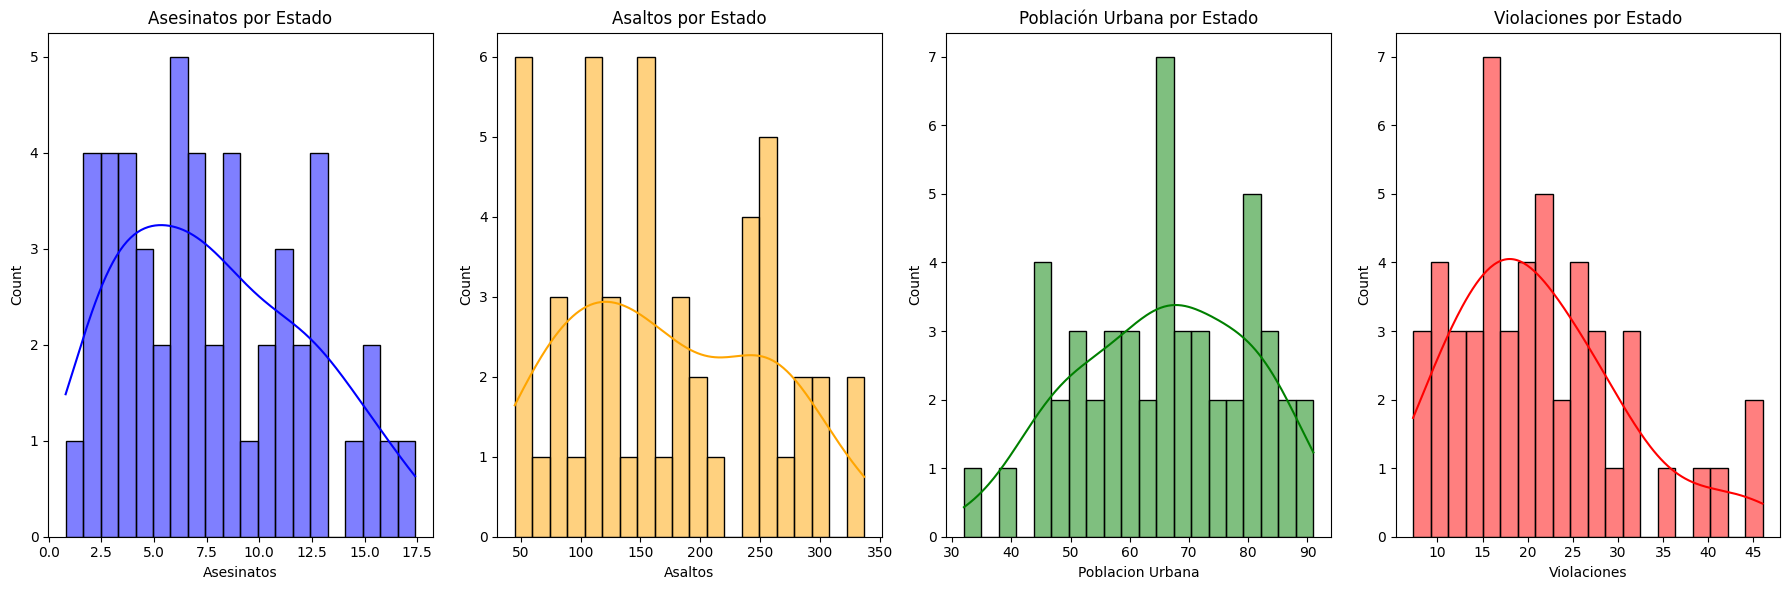

In [ ]:
# Visualización de la distribución de variables en un único gráfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

sns.histplot(data['Asesinatos'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Asesinatos por Estado')

sns.histplot(data['Asaltos'], bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Asaltos por Estado')

sns.histplot(data['Poblacion Urbana'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Población Urbana por Estado')

sns.histplot(data['Violaciones'], bins=20, kde=True, color='red', ax=axes[3])
axes[3].set_title('Violaciones por Estado')

plt.tight_layout()
plt.show()


2.5.- Correlaciones:
---------------------

🚩 En este punta debemos realizar la siguiente aclaracion a fin de que se interprete los codigos de correlaciones:

✅ Correlación cercana a 1: Indica una correlación positiva fuerte entre las dos variables. Esto significa que cuando una variable aumenta, la otra variable también tiende a aumentar, y viceversa.

✅ Correlación cercana a -1: Indica una correlación negativa fuerte entre las dos variables. Esto significa que cuando una variable aumenta, la otra variable tiende a disminuir, y viceversa.

✅ Correlación cercana a 0: Indica una correlación débil o nula entre las dos variables. En este caso, los cambios en una variable no están asociados de manera consistente con los cambios en la otra variable



✔ Se calcula la Matriz de correlación, para entender las relaciones lineales entre ellas.

✔ Aquí apreciamos una correlación positiva fuerte entre Asesinatos y Asaltos - Asesinatos y Violaciones aunque esta úlima en menor medida. En cambio se observa una correlación positiva débil entre Asesinatos y Población.

✔ Los Asaltos tienen una correlación Positifa fuerte con Asesinatos y Violaciones. Y una correlacion positiva débil con la Población.

✔ La población tiene una correlación positiva Medianamente fuerte con las Violaciones. Y es positiva debil con respespeto a Asesinatos y Asaltos

✔ Las violaciones tienen una correlacion positiva fuerte aunque de diferentes magnitudes con Asaltos, Asesinatos y Violaciones. Esto nos marca que es un delito que si depende de la cantidad de población.

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                  Asesinatos   Asaltos  Poblacion Urbana  Violaciones
Asesinatos          1.000000  0.801873          0.069573     0.563579
Asaltos             0.801873  1.000000          0.258872     0.665241
Poblacion Urbana    0.069573  0.258872          1.000000     0.411341
Violaciones         0.563579  0.665241          0.411341     1.000000


Matriz de correlaciones gráfica:

✔ Si bien no aporta información extra, si quiza, para ojos menos expertos, ayude a una mejor y mas rápida asimilación del tipo de relación entre características.

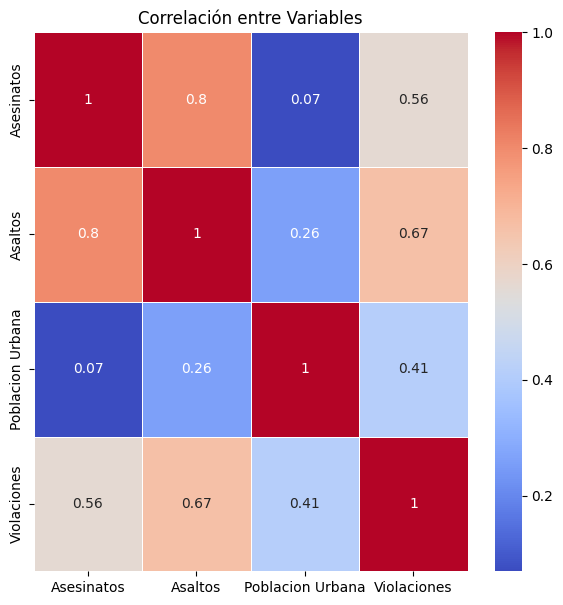

In [ ]:
# Visualización gráfica de la correlación entre variables
plt.figure(figsize=(7, 7))
sns.heatmap(data[['Asesinatos', 'Asaltos','Poblacion Urbana', 'Violaciones']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlación entre Variables')
plt.show()


2.6.- Grafica de relaciones entre características:
--------------------------------------------------

✔ Estos gráficos nos ayudan a seguir distinguiendo en forma visual las relaciones entre características

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fig. 2.4

# Establecer el tamaño total del gráfico
plt.figure(figsize=(12, 8))

# Subgráfico 1: Asesinatos vs. Asaltos
plt.subplot(2, 3, 1)
sns.regplot(x='Asesinatos', y='Asaltos', data=data, order=1, ci=None, line_kws={'color': 'red'})
plt.title('Relación entre Asesinatos y Asaltos con línea de regresión')

# Subgráfico 2: Asesinatos vs. Violaciones
plt.subplot(2, 3, 2)
sns.regplot(x='Asesinatos', y='Violaciones', data=data, order=1, ci=None, line_kws={'color': 'red'})
plt.title('Asesinatos vs. Violaciones')

# Subgráfico 3: Asesinatos vs. Poblacion
plt.subplot(2, 3, 3)
sns.regplot(x='Asesinatos', y='Poblacion Urbana', data=data, order=1, ci=None, line_kws={'color': 'red'})
plt.title('Asesinatos vs. Poblacion Urbana')

# Subgráfico 4: Asaltos vs. Violaciones
plt.subplot(2, 3, 4)
sns.regplot(x='Asaltos', y='Violaciones', data=data, order=1, ci=None, line_kws={'color': 'red'})
plt.title('Asaltos vs. Violaciones')

# Subgráfico 5: Asaltos vs. Poblacion
plt.subplot(2, 3, 5)
sns.regplot(x='Asaltos', y='Poblacion Urbana', data=data, order=1, ci=None, line_kws={'color': 'red'})
plt.title('Asaltos vs. Poblacion Urbana')

# Subgráfico 6: Violaciones vs. Poblacion
plt.subplot(2, 3, 6)
sns.regplot(x='Violaciones', y='Poblacion Urbana', data=data, order=1, ci=None, line_kws={'color': 'red'})
plt.title('Violaciones vs. Poblacion Urbana')

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

2.7.- Grafico de Cajas Boxplot:
-------------------------------

Boxplot

✔ Los diagramas de caja ayudan a identificar valores atípicos y la dispersión de datos, en forma gráfica.

✔ La línea central de la caja indica la mediana de los datos. Si los datos son simétricos, la mediana estará en el centro de la caja. Si los datos están sesgados, la mediana estará más cerca de la parte superior o inferior de la caja.

✔ Los extremos de arriba y abajo de la caja indican los cuantiles, o percentiles, 25 y 75. La longitud de la caja es la diferencia entre estos dos percentiles y se conoce como rango intercuartílico (IQR).

✔ Las líneas que se extienden desde la caja se llaman bigotes. Los bigotes representan la varianza esperada de los datos. Estos bigotes se extienden 1,5 veces el IQR desde los extremos superior e inferior de la caja.

✔ Si los datos no llegan hasta el final de los bigotes, estos se ajustan a los valores mínimo y máximo de los datos. Si hay datos que queden por encima o por debajo de los extremos de los bigotes, se los representa con puntos. Estos puntos se conocen como valores atípicos. Un valor atípico es el que supera la varianza esperada. Merece la pena revisar estos puntos de datos para aclarar si son atípicos o erróneos. Los bigotes no incluyen dichos valores.

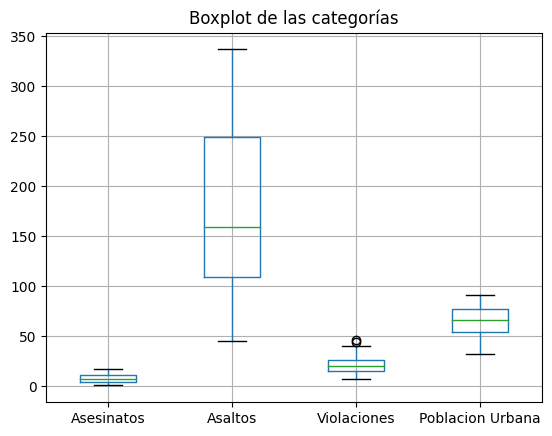

In [ ]:
# Grafico de boxplot
data.boxplot(column=['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana'])
plt.title('Boxplot de las categorías')
plt.show()

🚩 NOTA - Columna Abreviados :
--------------------------------------------------
Al llegar a la parte de intentar graficar con Plotly express el mapa de EEUU, dividido por estados, y coloreado de acuerdo a la Peligrosidad Baja o Alta de cada uno, nos encontramos con que al tener diferencia en la forma en que están cargados los nombres de los estados en el dataset y como los usa plotly express (usa la abreviación de estos), no podíamos graficarlos, motivo por el cual se crea un dataset aparte con los estados y su abreviación y se anexa la columna "Abreviado" al dataset "data".

In [ ]:
# Fusionar los dataframes en base a la columna 'Estado'
data['Abreviado'] = estados_abreviados['Abrev']

# Ahora, el dataframe 'data' tiene una nueva columna 'Abrev' con la abreviatura de los estados
data.info()

data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
 5   Abreviado         50 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Abreviado
0,Alabama,13.2,236,58,21.2,AL
1,Alaska,10.0,263,48,44.5,AK
2,Arizona,8.1,294,80,31.0,AR
3,Arkansas,8.8,190,50,19.5,AZ
4,California,9.0,276,91,40.6,CA
5,Colorado,7.9,204,78,38.7,CO
6,Connecticut,3.3,110,77,11.1,CT
7,Delaware,5.9,238,72,15.8,DE
8,Florida,15.4,335,80,31.9,FL
9,Georgia,17.4,211,60,25.8,GA


2.8.- Visualizacion de Distribucion de variables:
--------------------------------------------------

✔ Utilizamos pairplot para ver como estan distribuidas las variables

In [ ]:
# Visualizar la distribución de las variables
sns.pairplot(data)
plt.show()


3.- Normalización de Datos:
--------------------------

✔ La normalización es una práctica común en el análisis de datos para garantizar que las diferencias en las escalas de las características no afecten negativamente el rendimiento de los algoritmos.

✔ Se crea una instancia del StandardScaler y luego se utiliza para transformar las características seleccionadas (features).

✔ El método fit_transform de scaler, ajusta el escalador a los datos y transforma las características de manera que tengan una media de cero y una desviación estándar de uno. Este paso es esencial para asegurar que todas las características tengan la misma escala y evitar que una característica domine sobre las demás debido a sus magnitudes.



✔ Después de este paso, features_scaled contendrá las características normalizadas que se utilizarán en la aplicación de los algoritmos de clustering Kmean - DBScan y Mean Shift

In [ ]:
# Normalización de los datos:
# -------------------------------

# Seleccionar las características relevantes para el clustering
features = data[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

# Normalizar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


3.1.- Grafica de distribución Antes de Normalizar y Después de Normalizar:

✔ Aqui lo que queremos mostrar es como influye la normalización de los datos en el comportamiento de la dispersión.

In [ ]:
# Visualizacion de Distribucion Antes de Normalizar
# Codigo copiado de proceso anterior punto 2.2 Distribución de Variables
# Visualización de la distribución de variables en un único gráfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

sns.histplot(data['Asesinatos'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Asesinatos por Estado')

sns.histplot(data['Asaltos'], bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Asaltos por Estado')

sns.histplot(data['Poblacion Urbana'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Población Urbana por Estado')

sns.histplot(data['Violaciones'], bins=20, kde=True, color='red', ax=axes[3])
axes[3].set_title('Violaciones por Estado')

plt.tight_layout()
plt.show()

##############################################################################

# Visualizar las distribuciones de las características despues de normalizar
print()
print("Graficos Despues de Normalizar")
print('==============================')

colores=['blue', 'orange','green','red']
# Configuracion del tamaño total del gráfico
plt.figure(figsize=(18, 6 * features_scaled.shape[1]//3))
j=0 # variable de indice de colores

# Itera sobre las columnas normalizadas y crea subgráficos
for i in range(features_scaled.shape[1]):
  plt.subplot(features_scaled.shape[1]//4 + 1, 4, i + 1)
  sns.histplot(features_scaled[:, i], kde=True, bins=20, color=colores[j])
  j=j+1
  plt.title(f'Distribución de Feature {i} normalizada')

# Ajusta el diseño para evitar superposición
plt.tight_layout()

# Muestra el gráfico
plt.show()



4.- Grafica del Codo:
---------------------

✔ Este procedimiento nos ayuda, mediante una gráfica, a obtener el mejor K, para utilizar en el método KMeans. Consiste en buscar donde la curva se dobla o presenta un quiebre, donde por mas que los valores sigan aumentando esta no modifica en forma significativa su trayectoria.

✔ Para realizar esto nos ayudamos de la bibloteca yellowbrick.cluster, donde con el metodo KElbowVisualizer nos marca ese punto y nos indica su score().

✔ Observaremos como el código nos indica que el K mas optimo a utilizar es el K=4.

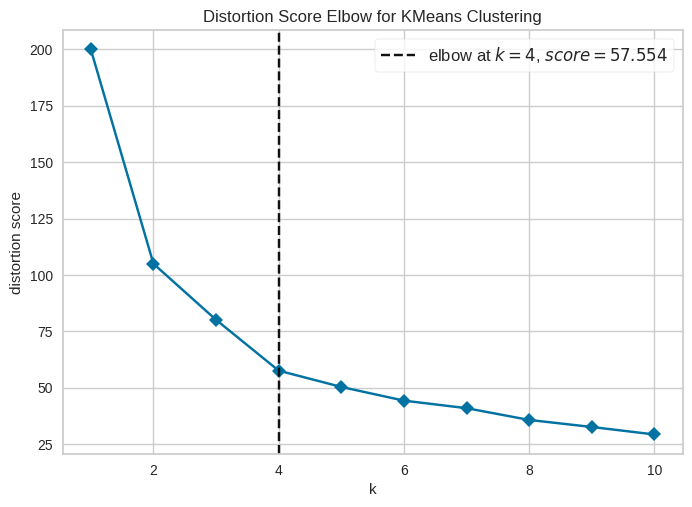

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Seleccionar el rango de clusters a probar
k_range = range(1, 11)

# Inicializar el modelo KMeans
kmeans = KMeans(random_state=42, n_init=10)

# Utilizar la visualización de codo para encontrar el número óptimo de clusters
visualizer = KElbowVisualizer(kmeans, k=k_range, metric='distortion', timings=False)

# Ajustar los datos normalizados (features_train_scaled)
visualizer.fit(features_scaled)

# Visualizar el gráfico de codo
visualizer.show()


5.- Metrica Silhouette:
-------------------------

✔ La siguiente figura, nos muestra la puntuación obtenida por cada cluster.Se evaluaron un rango de K de 2 a 11 y lo valores mas altos los obtienen los clusters 2 y 4.

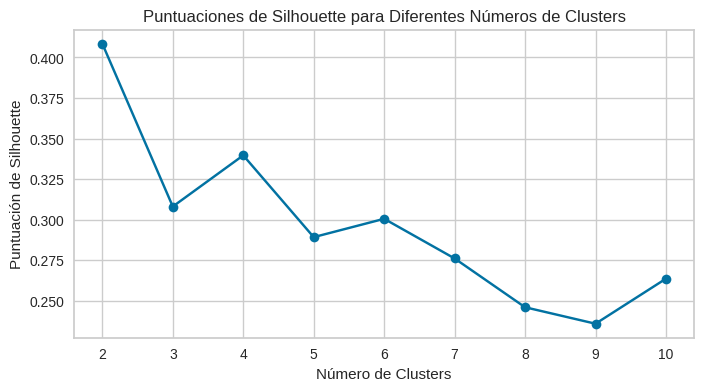

In [ ]:
from sklearn.metrics import silhouette_score

# Defino rango de K_range
k_range = range(2, 11)

# Lista para almacenar las puntuaciones de silhouette
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    labels = kmeans.labels_

    # Verificar que haya al menos dos clusters antes de calcular la puntuación de Silhouette
    if len(set(labels)) > 1:
      score = silhouette_score(features_scaled, labels)
      silhouette_scores.append(score)

# Visualizar las puntuaciones de Silhouette
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Puntuaciones de Silhouette para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silhouette')
plt.show()

6.- Metodos a Implementar KMeans - DBScan y Mean Shift:
-------------------------------------------------------

6.1.- Metodo KMeans:
--------------------

✔ Con este código ajustamos el modelo K-means para diferentes valores de k y muestra la puntuación de Silhouette correspondiente.

✔ De esta forma puedemos elegir el número de clusters que tenga la mejor puntuación de Silhouette.

In [ ]:
# Ajustar modelo K-means
best_kmeans_score = -1
best_kmeans_cluster = None


# Vamos a probar diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(features_scaled)
    kmeans_score = silhouette_score(features_scaled, kmeans_labels)
    labels = kmeans.predict(features_scaled)

    if kmeans_score > best_kmeans_score:
      best_kmeans_score = kmeans_score
      best_kmeans_cluster = kmeans_labels


    # Calcular y mostrar la puntuación de Silhouette
    silhouette_avg = silhouette_score(features_scaled, labels)
    print(f'Número de Clusters: {k}, Puntuación de Silhouette: {silhouette_avg}')

Número de Clusters: 2, Puntuación de Silhouette: 0.4084890326217641
Número de Clusters: 3, Puntuación de Silhouette: 0.30813622648945616
Número de Clusters: 4, Puntuación de Silhouette: 0.33968891433344395
Número de Clusters: 5, Puntuación de Silhouette: 0.2892698909578641
Número de Clusters: 6, Puntuación de Silhouette: 0.3005771754063692
Número de Clusters: 7, Puntuación de Silhouette: 0.2761342454285954
Número de Clusters: 8, Puntuación de Silhouette: 0.24606152983626525
Número de Clusters: 9, Puntuación de Silhouette: 0.2359060232768202
Número de Clusters: 10, Puntuación de Silhouette: 0.2636703762849359


6.2.- Metodo DBScan:
--------------------

✔ Con este código se realiza el entrenamiento del modelo DBScan, con los únicos parámetros que logramos conseguir que nos de "Al Menos" dos cluster fuen con eps=2 y min_sample=5 y con eps=1 y min_saple=10.

✔ La mejor puntuación de Silhouette entre las dos opciones que nos brindaron "Al menos" dos cluster fue con eps=2 y min_sample=5.

In [ ]:
# Ajustar modelo DBScan
dbscan_model = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(features_scaled)

# Verificar si DBScan generó al menos dos clusters antes de calcular la puntuación de Silhouette
if len(set(dbscan_labels)) > 1:
  dbscan_score = silhouette_score(features_scaled, dbscan_labels)
else:
  dbscan_score = None

6.3.- Mean Shift:
------------------

In [ ]:
# Ajustar modelo Mean Shift
meanshift_model = MeanShift()
meanshift_labels = meanshift_model.fit_predict(features_scaled)

# Verificar si MeanShift generó al menos dos clusters antes de calcular la puntuación de Silhouette
if len(set(meanshift_labels)) > 1:
  meanshift_score = silhouette_score(features_scaled, meanshift_labels)
else:
  meanshift_score = None

7.- Graficos de los resultados de los modelos:
-----------------------------------------------

✔ Se realizan los gráficos de los modelos en un solo grafico así es mas fácil la comparación.

✔ Aqui observamos que si bien la curva del codo nos dia que el "K" optimo era el K=4, el gráfico de Puntuación de Silhouette toma como la mejor clasificación dos cluster o grupos K=2.

✔ También podemos observar el método con mejor puntuacion de Silhouette, es el KMeans con una puntuación de 0.41.

✔ El segundo es el Mean Shift que obtuvo una puntuación de Silhouette de 0.25.

✔ El último y peor de todos con una muy baja puntuación, (Siendo la mejor que obtuvimos con los parametros de eps:1 y min_samples=5) de 0.17.

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(15, 5))

# K-means
plt.subplot(1, 3, 1)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=best_kmeans_cluster, cmap='viridis', s=50)
plt.title(f'K-means Clustering\nSilhouette Score: {best_kmeans_score:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# DBScan
plt.subplot(1, 3, 2)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)

# Verificar si DBScan generó al menos dos clusters antes de calcular la puntuación de Silhouette
if dbscan_score is not None:
    plt.title(f'DBScan Clustering\nSilhouette Score: {dbscan_score:.2f}')
else:
    plt.title(f'DBScan Clustering\nSilhouette Score: N/A')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Mean Shift
plt.subplot(1, 3, 3)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=meanshift_labels, cmap='viridis', s=50)

# Verificar si MeanShift generó al menos dos clusters antes de calcular la puntuación de Silhouette
if meanshift_score is not None:
    plt.title(f'Mean Shift Clustering\nSilhouette Score: {meanshift_score:.2f}')
else:
    plt.title(f'Mean Shift Clustering\nSilhouette Score: N/A')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

8.- ANALISIS FINAL:
-------------------

8.1.- KMeans con K= 4:
----------------------

✔ Habiendo elaborado tres métodos y viendo sus desempeños, optamos por el que mejor puntuación obtuvo que fue el KMeans.

✔ Como el estudio del codo nos dio que el K más optimo es el K=4, (También se converso en clase sobre el tema), y pese a que según la Puntuación de Silhouette deberíamos usar K=2, El ralizaremos el análisis se va a realizar con un K=4.


In [ ]:
# Elegir el número óptimo de clústeres
k_optimo = 4

# Inicializar y entrenar el modelo KMeans
kmeans_model = KMeans(n_clusters=k_optimo, random_state=42, n_init=5)
data['Cluster'] = kmeans_model.fit_predict(features_scaled)


# #data_Cluster= data.copy()
# kmeans_model = KMeans(n_clusters=k_optimo, random_state=42, n_init=5)
# data['Cluster'] = kmeans_model.fit_predict(features_scaled)

# #     kmeans.fit(features_scaled)
# #   labels = kmeans.predict(features_scaled)


8.2.- Visualizacion de Metricas de Clusters:
---------------------------------------------

✔ Análisis de las métricas de cada uno de los clusters.

✔ Observamos el promedio y desvio standard de cada categoría y por cluster.

In [ ]:
# Visualizar los resultados
for cluster in range(k_optimo):
  # print(f"Cluster {cluster + 1}:")
  print(f"Cluster {cluster}:")
  print(data[data['Cluster'] == cluster].describe().loc[['mean', 'std']])
  print("\n")


Cluster 0:
      Asesinatos     Asaltos  Poblacion Urbana  Violaciones  Cluster
mean    5.656250  138.875000         73.875000    18.781250      0.0
std     1.647207   41.175842          8.935883     5.236439      0.0


Cluster 1:
      Asesinatos   Asaltos  Poblacion Urbana  Violaciones  Cluster
mean   13.937500  243.6250         53.750000    21.412500      1.0
std     2.601614   49.7535          8.048957     3.811425      0.0


Cluster 2:
      Asesinatos     Asaltos  Poblacion Urbana  Violaciones  Cluster
mean   10.815385  257.384615          76.00000    33.192308      2.0
std     2.083605   43.559420          10.77033     7.282337      0.0


Cluster 3:
      Asesinatos    Asaltos  Poblacion Urbana  Violaciones  Cluster
mean    3.600000  78.538462         52.076923    12.176923      3.0
std     2.362555  25.708674         10.086803     3.258618      0.0




✔ Visualización grafica de los clusters

In [ ]:
# # Graficar los clústeres en función de las características
# import seaborn as sns
# sns.pairplot(data, hue='Cluster')
# plt.show()

# Define el diccionario de colores para cada clúster
cluster_colors = {0: 'yellow', 1: 'red', 2: 'orange', 3: 'green'}

# Mapea los colores a los datos en función del clúster
data['Cluster_Color'] = data['Cluster'].map(cluster_colors)

# Graficar los clústeres en función de las características
sns.pairplot(data, hue='Cluster_Color', palette=cluster_colors.values())
plt.show()

8.3.- Interpretación de cada Cluster:
--------------------------------------

✅ Aqui tenemos que aclarar el criterio que se toma para la asignación del grado de peligrosidad que se le da a cada Cluster obtenido:

✔ Teniendo en cuenta, los escasos conocimientos en temas jurídicos, que los tiempos de entrega no dan para realizar una investigación mas profunda sobre seguridad y leyes o para consultar a algún letrado sobre la magnitud de los pesos de cada delito y como si fuera poco se agrega la dificultad de que cada pais se rige por sus propias leyes en estos temas, es posible que exita un error en el criterio aplicado para la argumentación del proceso.

Aclarado esto se pasa a detallar el criterio empleado:

✔ Se parte de la premisa que el mayor peso de los delitos los tiene el Asesinato, por la gravedad que reviste, la quita de una vida.

✔ En segundo lugar se da mas prevalescencia a las Violaciones.

✔ En el tercero se consideran los Asaltos.

✔ También se contempla la cantidad de la Población.


Habiendo aclarado estos items y observando los resultados de cada cluster del punto 8.2- Analisis de Metricas:


En la gáfica de Boxplot vemos claramente que el cluster 3: es el de mas BAJA peligrosidad, luego en una Peligrosidad que llamaremos MEDIA-BAJA tenemos al cluster 0. Aquí en adelante es donde tenemos que hacer uso de nuestro criterio, descripto anteriormente, ya que los cluster 1 y 2 estan un poco mezclado en cuanto a los delitos, ya que el cluestr 1 es mas alto en Asesinatos y el 2 tiene mayor cantidad de Violaciones y en Asaltos tienen medianas bastante cercanas con poca diferencia.

Como dimos mas peso a los Asesinatos, y el cluster 1 tiene la mayor cantidad de estos, y además posee menor población se lo considerará mas peligroso que el cluster 2, ya que pobabilisticamente un habitante de este tiene mas factibilidad de ser victima de uno de estos delitos que un habitante del cluster 2.

✔ RESUMIENDO:

✍ Cluster 0 -- Baja Peligrosidad

✍ Cluster 3 -- Media-Baja Peligrosidad

✍ Cluster 2 -- Media-Alta Peligrosidad

✍ Cluster 1 -- Alta Peligrosidad

In [ ]:
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crea boxplots para cada variable en cada cluster
plt.figure(figsize=(15, 8))

for i, column in enumerate(features.columns, 1):
#for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'Boxplot de {column} por Cluster')

plt.tight_layout()
plt.show()

8.4.- Asignacion de Etiquetas de peligrosidad a cada Cluster:
-------------------------------------------------------------

✔ Se asigna a cada cluster la etiqute de peligrosidad correspondiente, de acuerdo a nuestro análisis.

In [ ]:
# Definir umbrales para cada categoría
umbrales = {
    'Baja': 3,
    'Media-Baja': 0,
    'Media-Alta': 2,
    'Alta': 1
}

# Función para asignar categorías
def asignar_categoria(cluster_normalizado):
    if cluster_normalizado == 3:
        return 'Baja'
    elif cluster_normalizado == 0:
        return 'Media-Baja'
    elif cluster_normalizado == 2:
        return 'Media-Alta'
    elif cluster_normalizado == 1:
        return 'Alta'
    else:
      return ''

# Aplicar la función para asignar categorías
data['Categoria de Peligrosidad'] = data['Cluster'].apply(asignar_categoria)

# Visualizar los resultados
print(data[['Estado', 'Categoria de Peligrosidad','Cluster']])

            Estado Categoria de Peligrosidad  Cluster
0          Alabama                      Alta        1
1           Alaska                Media-Alta        2
2          Arizona                Media-Alta        2
3         Arkansas                      Alta        1
4       California                Media-Alta        2
5         Colorado                Media-Alta        2
6      Connecticut                Media-Baja        0
7         Delaware                Media-Baja        0
8          Florida                Media-Alta        2
9          Georgia                      Alta        1
10          Hawaii                Media-Baja        0
11           Idaho                      Baja        3
12        Illinois                Media-Alta        2
13         Indiana                Media-Baja        0
14            Iowa                      Baja        3
15          Kansas                Media-Baja        0
16        Kentucky                      Baja        3
17       Louisiana          

8.5.- Grafica de barras de Estados y Peligrosidad:
------------------------------------------------------

✔ Se reprentan los Cluster 0 , 1 , 2 , 3 y su estado de peligrosidad. El cluster 0, no alcanza a ser visble ya que esta variable es la que se representa en el eje y y al ser 0 no se aprecia.

✔ Se creo un dataset data_mostrar_bar y a los clusters se les suma uno asi se puede apreciar las barras en el grafico.  

In [ ]:
import plotly.express as px

# Crea un diccionario de colores para las categorías
colores_categorias = {'Baja': 'green', 'Media-Baja': 'yellow', 'Media-Alta': 'orange', 'Alta': 'red'}

eje_y_cluster = data
# Actualiza el gráfico de barras

# Codigo original pero que las barras del cluster 0 no se aprecian por no tener alto ya que el eje Y es cero.
# figBarEstado = px.bar(data, x="Estado", y="Cluster", color="Categoria de Peligrosidad", text="Categoria de Peligrosidad",
#                      color_discrete_map=colores_categorias, barmode="group")
# creado solo para este punto
data_mostrar_bar = data.copy()
data_mostrar_bar['Cluster_Mas_1'] = data['Cluster']+1

figBarEstado = px.bar(data_mostrar_bar, x="Estado", y='Cluster_Mas_1' , color="Categoria de Peligrosidad", text="Categoria de Peligrosidad",
                      color_discrete_map=colores_categorias, barmode="group")


figBarEstado.update_layout(
    title="Peligrosidad por estado",
    title_x=0.5,
    xaxis=dict(title="Estados"),
    yaxis=dict(title="Cluster", side="left"))

# Muestra los gráficos
figBarEstado.show()

✔ Obtención de la cantidad de estados de cada Cluster

In [ ]:
# Obtener el recuento de estados en cada cluster
cluster_counts = data['Categoria de Peligrosidad'].value_counts()

# Mostrar el recuento de estados en cada cluster
print("Recuento de estados en cada cluster:")
print(cluster_counts)

Recuento de estados en cada cluster:
Media-Baja    16
Media-Alta    13
Baja          13
Alta           8
Name: Categoria de Peligrosidad, dtype: int64


✔ Visualización por grafico de barras de la cantidad de Estados por CLuster

In [ ]:
# Visualizar el recuento de estados en cada cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Categoria de Peligrosidad', data=data, palette='viridis')
plt.title('Recuento de Estados en Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recuento')
plt.show()

9.- Impresión de los Estados que componen cada Cluster:
-------------------------------------------------------

In [ ]:
# Crear un nuevo DataFrame para almacenar los estados por cluster
cluster_df = pd.DataFrame()
categorias_df= pd.DataFrame()

# Agrupar por el valor del cluster y obtener los estados en cada cluster
cluster_groups = data.groupby('Cluster')['Estado'].apply(list)

# Para encontrar la longitud máxima de los estados en todos los clusters
max_len = max(len(estados) for estados in cluster_groups)

# Llenar el DataFrame con los estados por cluster
for cluster, estados in cluster_groups.items():
  estados += [''] * (max_len - len(estados))
  cluster_df[f'Cluster {cluster}'] = estados

# Imprimir el DataFrame
print(cluster_df)



        Cluster 0       Cluster 1   Cluster 2      Cluster 3
0     Connecticut         Alabama      Alaska          Idaho
1        Delaware        Arkansas     Arizona           Iowa
2          Hawaii         Georgia  California       Kentucky
3         Indiana       Louisiana    Colorado          Maine
4          Kansas     Mississippi     Florida      Minnesota
5   Massachusetts  North Carolina    Illinois        Montana
6      New Jersey  South Carolina    Maryland       Nebraska
7            Ohio       Tennessee    Michigan  New Hampshire
8        Oklahoma                    Missouri   North Dakota
9          Oregon                      Nevada   South Dakota
10   Pennsylvania                  New Mexico        Vermont
11   Rhode Island                    New York  West Virginia
12           Utah                       Texas      Wisconsin
13       Virginia                                           
14     Washington                                           
15        Wyoming       

10.- Gráfico Interactivo en 3D de Las características:
------------------------------------------------------

✔ Utilizamos el modulo "go.Scatter3d" de la librería "plotly.graph_objects" para cada clúster y asignamos el color correspondiente del diccionario cluster_colors, según nuestra asociación de Clustre-Peligrosidad. Se ajusta tamaño del marcador, opacidad y el símbolo.

✔ Con el objetivo de intentar apreciar mejor la distribución de los cluster, se realiza un gráfico en 3d Interactivo, que se puede girar de a cuerdo a que grupo queremos obsrvar. Al tener profundidad apreciamos mejor la agrupación de los cluster.

✔ Se representaron Asesinatos, Asaltos y Violaciones. no así la Población ya que nos excedemos en las dimensiones.

In [ ]:
import plotly.graph_objects as go

# Define el diccionario de colores para cada clúster
cluster_colors = {0: 'yellow', 1: 'red', 2: 'orange', 3: 'green'}

# Agrega una columna para el color de cada punto en función del clúster
data['Cluster_Color'] = data['Cluster'].map(cluster_colors)

# Visualización 3D con Plotly
fig = go.Figure()

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Asesinatos'],
        y=cluster_data['Asaltos'],
        z=cluster_data['Violaciones'],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.7,
            color=cluster_colors[cluster],
            symbol='circle',
            line=dict(width=0)
        ),
        name=f'Cluster {cluster}'
    ))

# Configuración del diseño del gráfico
fig.update_layout(
    scene=dict(
        xaxis_title='Asesinatos',
        yaxis_title='Asaltos',
        zaxis_title='Violaciones'
    ),
    width=800,
    height=600,
    title='Visualización 3D de Clústeres (KMeans)'
)

# Mostrar la visualización interactiva
fig.show()

11.- Mapa por Estados y su Peligrosidad:
-----------------------------------------

✔ Para una mejor interpretación de los datos se realiza este mapa de EEUU con sus estados coloreados de acuerdo a su peligrosidad.

In [ ]:
# Actualiza el mapa de calor
figMapEstado = px.choropleth(data, locations='Abreviado', locationmode='USA-states', scope='usa',
                              color='Categoria de Peligrosidad', color_discrete_map=colores_categorias)

figMapEstado.update_layout(
    title='Mapa de los estados según grado de peligrosidad',
    title_x=0.5)

# Muestra los gráficos
figMapEstado.show()

✅ RESUMEN FINAL:
===============

✔ En Resumen para responder el enunciado podemos destacar que:

✍ La parte Sureste de EEUU es la mas peligrosa, sumandose a este grupo al estado de  Arkansas.

✍ Podríamos decir que el Sur de EEUU tiene los estados mas peligroso, ya que esta dominado por estados catalogados como Alta peligrosidad o Media-Alta peligrosidad.

✍ En general la parte Norte es la parte menos peligrosa o mas segura, y algunos estados del este, como Maine, New Hampshire o Vermont.

✍ Los estado de Media-Baja peligrosidad los encontraremos en la parte central y este.

✍ Estas clasificaciones tienen mucho sentido, ya que en el Sur tiene una amplia frontera con Mexico. Sabemos que las ciudades Mexicanas lindantes a EEUU estan tomadas y manejadas por los Carteles Narco mas grandes de Mexico, que aprovechando la cercania y la gran extension de frontera realizan el traspaso de droga de infinidad de formas. Esto hace que los delitos en el lado de EEUU aumenten. El comercio de droga traee aparejado los robos, asesinatos y otros tipos de delitos.
Por otro lado la parte este que linda con el Atlántico, se convierte en el destino mas buscado por los carteles de Colombia para desembarcar sus cargamentos aprovechando las costas y puertos.

✍ El Norte tiende a ser mas tranquilo debido a que limita con Canada y el Océano Artico, zonas mucho mas alejadas y frias para cualquier incursión de esta índole.


In [ ]:
# Crear un nuevo DataFrame para almacenar los estados por cluster
categorias_df= pd.DataFrame()

# Agrupar por el valor del cluster y obtener los estados en cada cluster
categorias_groups = data.groupby('Categoria de Peligrosidad')['Estado'].apply(list)

# Para encontrar la longitud máxima de los estados en todos los clusters
max_len = max(len(estados) for estados in categorias_groups)


# Llenar el DataFrame con los estados por cluster
for categ, estados in categorias_groups.items():
  estados += [''] * (max_len - len(estados))
  categorias_df[f'{categ}'] = estados


# Impresion de Resumen de las Categorias de los Estados
print(" R E S U M E N   E S T A D O S   P O R  C A T E G O R I A")
print("==============   =============   ====== ==================")

print()
print()

# Imprimir el DataFrame
print(categorias_df)


 R E S U M E N   E S T A D O S   P O R  C A T E G O R I A
==============   =============   ====== ==================


              Alta           Baja  Media-Alta     Media-Baja
0          Alabama          Idaho      Alaska    Connecticut
1         Arkansas           Iowa     Arizona       Delaware
2          Georgia       Kentucky  California         Hawaii
3        Louisiana          Maine    Colorado        Indiana
4      Mississippi      Minnesota     Florida         Kansas
5   North Carolina        Montana    Illinois  Massachusetts
6   South Carolina       Nebraska    Maryland     New Jersey
7        Tennessee  New Hampshire    Michigan           Ohio
8                    North Dakota    Missouri       Oklahoma
9                    South Dakota      Nevada         Oregon
10                        Vermont  New Mexico   Pennsylvania
11                  West Virginia    New York   Rhode Island
12                      Wisconsin       Texas           Utah
13                         